In [5]:
import sys,os
sys.path.append('..')
import h5py
import time
import numpy as np
import matplotlib.pyplot as plt
import torch as T
from ccat_holo.Pyccat import CCAT_holo

DEVICE0=T.device('cpu')
measuredbeams='../Meas_beams/GRASP_296GHz_51_51.txt'

In [ ]:
'''Calculate the beam of distorted beam maps'''
holo_setup={'Rx1':([0,0,600],'../scan/mainbeam/on-axis.txt'),
            'Rx2':([400,400,600],'../scan/mainbeam/pos_pos_near.txt'),
            'Rx3':([400,-400,600],'../scan/mainbeam/pos_neg_near.txt'),
            'Rx4':([-400,400,600],'../scan/mainbeam/neg_pos_near.txt'),
            'Rx5':([-400,-400,600],'../scan/mainbeam/neg_neg_near.txt')
            }
Model=CCAT_holo('../CCAT_model','./Meas_beams',holo_conf=holo_setup)
S=np.genfromtxt('./Meas_beams/input_error_panel.txt')/2

In [ ]:
# case without large deformation on M1 and M2
E_m2=0
E_m1=0
Model.First_Beam_cal(S2_init=S[0:5*69],
                     S1_init=S[5*69:],
                     Matrix=True,
                     Error_m2=E_m2,Error_m1=E_m1)

In [ ]:
'''read the simulated '''
Model.mk_FF(fitting_param='panel adjusters',
            Device=T.device('cpu'),
            Memory_reduc=False)

S0=T.tensor(np.zeros(5*(69+77)))
P_amp=np.zeros((5,6))
P_amp[:,0]=1
P_amp=T.tensor(P_amp.ravel())
P_phase=T.tensor(np.zeros(5*5))

DATA=model.FF(S0,P_amp,P_phase)
np.savetxt(measuredbeams,DATA.numpy(),delimiter=',')

# Model with large-scale deforamtions (twisted errors) on M2, panel errors

In [2]:
import sys,os
sys.path.append('..')
import h5py
import time
import numpy as np
import matplotlib.pyplot as plt
import torch as T
from ccat_holo.Pyccat import CCAT_holo

DEVICE0=T.device('cpu')

In [3]:
'''Calculate the beam of distorted beam maps'''
holo_setup={'Rx1':([0,0,600],'../scan/mainbeam/on-axis.txt'),
            'Rx2':([400,400,600],'../scan/mainbeam/pos_pos_near.txt'),
            'Rx3':([400,-400,600],'../scan/mainbeam/pos_neg_near.txt'),
            'Rx4':([-400,400,600],'../scan/mainbeam/neg_pos_near.txt'),
            'Rx5':([-400,-400,600],'../scan/mainbeam/neg_neg_near.txt')
            }
Model=CCAT_holo('../CCAT_model','./Meas_beams',holo_conf=holo_setup)
S=np.genfromtxt('./Meas_beams/input_error_panel.txt')/2

FYST telescope model has been created!!


In [8]:
# case without large deformation on M1 and M2, for example M2 is twisted.
co=np.array([[0., 0., 0.],
             [0., 0.23, 0.],
             [0., 0., 0.]])
E_m2=np.polynomial.polynomial.polyval2d(Model.m2_0.x/Model.R2,Model.m2_0.y/Model.R2,co)
E_m1=0
Model.First_Beam_cal(S2_init=S[0:5*69],
                     S1_init=S[5*69:],
                     Matrix=True,
                     Error_m2=E_m2,Error_m1=E_m1)

The holographic setup:
Rx1 : [0, 0, 600] ../scan/mainbeam/on-axis.txt
Rx2 : [400, 400, 600] ../scan/mainbeam/pos_pos_near.txt
Rx3 : [400, -400, 600] ../scan/mainbeam/pos_neg_near.txt
Rx4 : [-400, 400, 600] ../scan/mainbeam/neg_pos_near.txt
Rx5 : [-400, -400, 600] ../scan/mainbeam/neg_neg_near.txt

***Start the initial beam calculations 
***and prepare the required Matrixes used to speed up the forward beam calculations.
Rx1 : [0, 0, 600] ../scan/mainbeam/on-axis.txt
step 1:

step 2:

step 3:

step 4:

time used: 84.1242297
Rx2 : [400, 400, 600] ../scan/mainbeam/pos_pos_near.txt
step 1:

step 2:

step 3:

step 4:

time used: 85.85233010000002
Rx3 : [400, -400, 600] ../scan/mainbeam/pos_neg_near.txt
step 1:

step 2:

step 3:

step 4:

time used: 80.69722860000002
Rx4 : [-400, 400, 600] ../scan/mainbeam/neg_pos_near.txt
step 1:

step 2:

step 3:

step 4:

time used: 80.09686250000004
Rx5 : [-400, -400, 600] ../scan/mainbeam/neg_neg_near.txt
step 1:

step 2:

step 3:

step 4:

time used: 8

Beam Rx: Meas_beams/data_Rx_dx400_dy400_dz600.h5


e:\E_Laptop_new\Project in Köln\1_Holography inference\program_oldVersion\examples_Amp\..\ccat_holo\Pyccat.py:455: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p1=axs[0].pcolor(x,y,20*np.log10(np.abs(beam)),cmap='jet')
e:\E_Laptop_new\Project in Köln\1_Holography inference\program_oldVersion\examples_Amp\..\ccat_holo\Pyccat.py:457: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p2=axs[1].pcolor(x,y,np.angle(beam)*180/np.pi,cmap='jet',vmax=180,vmin=-180)


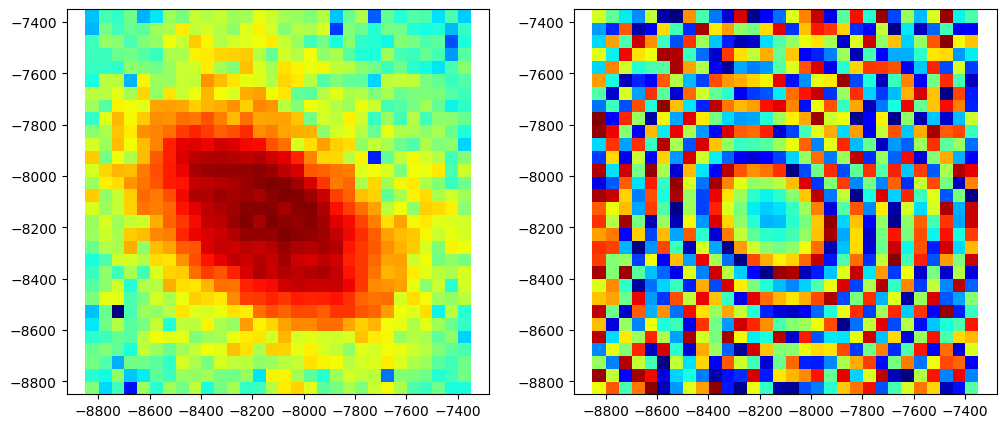

[16] [15] -58.32019334174195


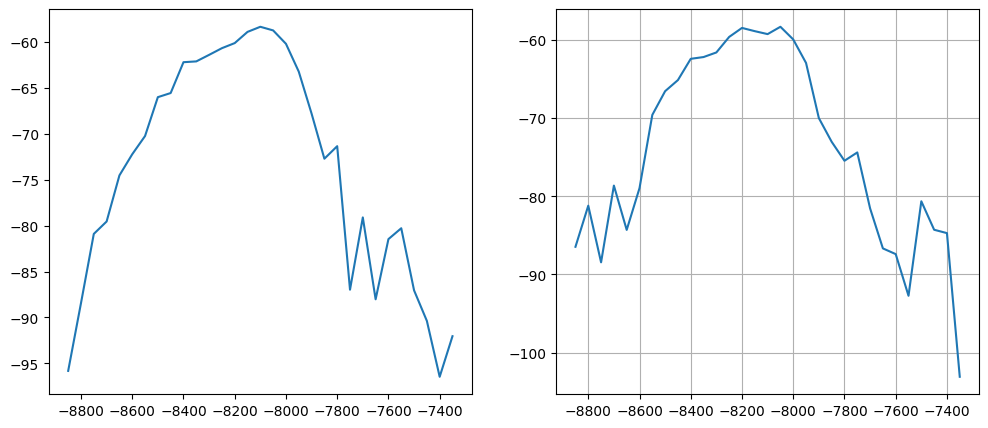

e:\E_Laptop_new\Project in Köln\1_Holography inference\program_oldVersion\examples_Amp\..\ccat_holo\Pyccat.py:482: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p1=axs.pcolor(x,y,


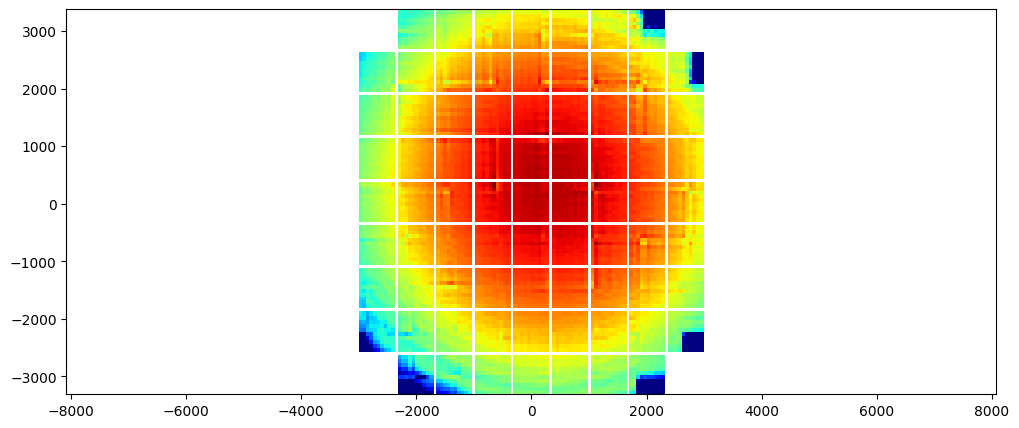

e:\E_Laptop_new\Project in Köln\1_Holography inference\program_oldVersion\examples_Amp\..\ccat_holo\Pyccat.py:495: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p1=axs[0].pcolor(x[0,:],y[:,0],20*np.log10(np.abs(F_IF)),cmap='jet')
e:\E_Laptop_new\Project in Köln\1_Holography inference\program_oldVersion\examples_Amp\..\ccat_holo\Pyccat.py:497: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p2=axs[1].pcolor(x,y,np.angle(F_IF)*180/np.pi,cmap='jet',vmax=180,vmin=

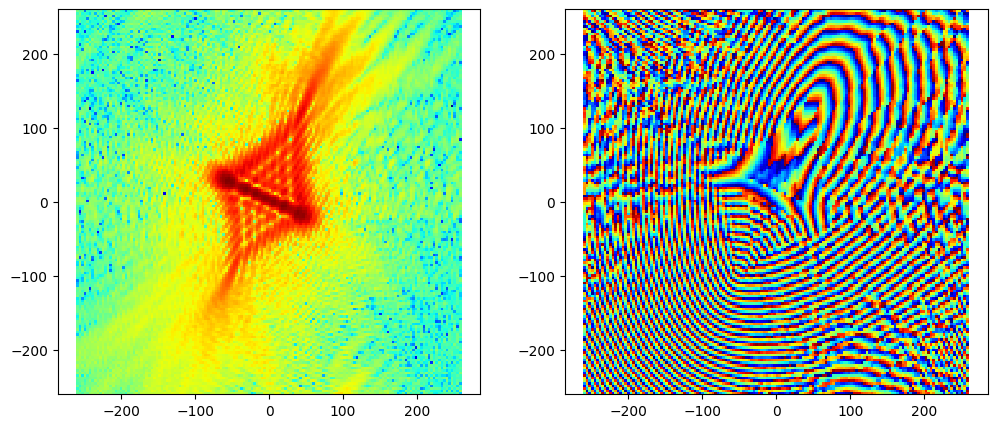

e:\E_Laptop_new\Project in Köln\1_Holography inference\program_oldVersion\examples_Amp\..\ccat_holo\Pyccat.py:512: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p1=axs[0].pcolor(x,y,
e:\E_Laptop_new\Project in Köln\1_Holography inference\program_oldVersion\examples_Amp\..\ccat_holo\Pyccat.py:515: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p2=axs[1].pcolor(x,y,


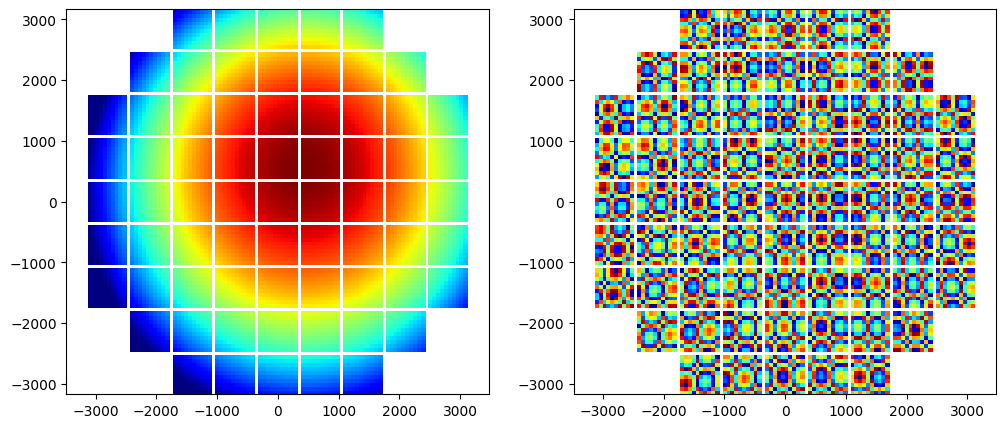

In [11]:
Model.plot_beam(filename= 'Meas_beams/data_Rx_dx400_dy400_dz600.h5')

In [10]:
'''read the simulated '''
Model.mk_FF(fitting_param='panel adjusters',
            Device=T.device('cpu'),
            Memory_reduc=False)

S0=T.tensor(np.zeros(5*(69+77)))
P_amp=np.zeros((5,6))
P_amp[:,0]=1
P_amp=T.tensor(P_amp.ravel())
P_phase=T.tensor(np.zeros(5*5))

DATA=Model.FF(S0,P_amp,P_phase)
measuredbeams='./Meas_beams/GRASP_296GHz_31_31_0_23Twist_10umPanel.txt'
np.savetxt(measuredbeams,DATA.numpy(),delimiter=',')

In [ ]:
Model.m2_0.y.max()/Model.R2

# Model with large-scale deforamtions on M2, no panel errors, no Rx position errors

In [11]:
import sys,os
sys.path.append('..')
import h5py
import time
import numpy as np
import matplotlib.pyplot as plt
import torch as T
from ccat_holo.Pyccat import CCAT_holo

DEVICE0=T.device('cpu')
measuredbeams2='../Meas_beams2/GRASP_296GHz_51_51_Large_deformations_0.txt'

'''Calculate the beam of distorted beam maps'''
holo_setup={'Rx1':([0,0,600],'../scan/mainbeam/on-axis.txt'),
            'Rx2':([400,400,600],'../scan/mainbeam/pos_pos_near.txt'),
            'Rx3':([400,-400,600],'../scan/mainbeam/pos_neg_near.txt'),
            'Rx4':([-400,400,600],'../scan/mainbeam/neg_pos_near.txt'),
            'Rx5':([-400,-400,600],'../scan/mainbeam/neg_neg_near.txt')
            }
Model=CCAT_holo('../CCAT_model','./Meas_beams2',holo_conf=holo_setup)
S=np.zeros(5*(69+77))

FYST telescope model has been created!!


In [12]:
# case without large deformation on M1 and M2, for example M2 is twisted.
co=np.array([[0., 0., 0.],
             [0., 0.1, 0.0],
             [0., 0.0, 0.0]])
E_m2=np.polynomial.polynomial.polyval2d(Model.m2_0.x/Model.R2,Model.m2_0.y/Model.R2,co)
E_m1=0
Model.First_Beam_cal(S2_init=S[0:5*69],
                     S1_init=S[5*69:],
                     Matrix=True,
                     Error_m2=E_m2,Error_m1=E_m1)

The holographic setup:
Rx1 : [0, 0, 600] ../scan/mainbeam/on-axis.txt
Rx2 : [400, 400, 600] ../scan/mainbeam/pos_pos_near.txt
Rx3 : [400, -400, 600] ../scan/mainbeam/pos_neg_near.txt
Rx4 : [-400, 400, 600] ../scan/mainbeam/neg_pos_near.txt
Rx5 : [-400, -400, 600] ../scan/mainbeam/neg_neg_near.txt

***Start the initial beam calculations 
***and prepare the required Matrixes used to speed up the forward beam calculations.
Rx1 : [0, 0, 600] ../scan/mainbeam/on-axis.txt
step 1:

step 2:

step 3:

step 4:

time used: 83.28634249999959
Rx2 : [400, 400, 600] ../scan/mainbeam/pos_pos_near.txt
step 1:

step 2:

step 3:

step 4:

time used: 83.97582469999907
Rx3 : [400, -400, 600] ../scan/mainbeam/pos_neg_near.txt
step 1:

step 2:

step 3:

step 4:

time used: 86.40047489999779
Rx4 : [-400, 400, 600] ../scan/mainbeam/neg_pos_near.txt
step 1:

step 2:

step 3:

step 4:

time used: 116.06464790000246
Rx5 : [-400, -400, 600] ../scan/mainbeam/neg_neg_near.txt
step 1:

step 2:

step 3:

step 4:

time

Beam Rx: Meas_beams2/data_Rx_dx400_dy400_dz600.h5


e:\E_Laptop_new\Project in Köln\1_Holography inference\program_oldVersion\examples_Amp\..\ccat_holo\Pyccat.py:455: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p1=axs[0].pcolor(x,y,20*np.log10(np.abs(beam)),cmap='jet')
e:\E_Laptop_new\Project in Köln\1_Holography inference\program_oldVersion\examples_Amp\..\ccat_holo\Pyccat.py:457: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p2=axs[1].pcolor(x,y,np.angle(beam)*180/np.pi,cmap='jet',vmax=180,vmin=-180)


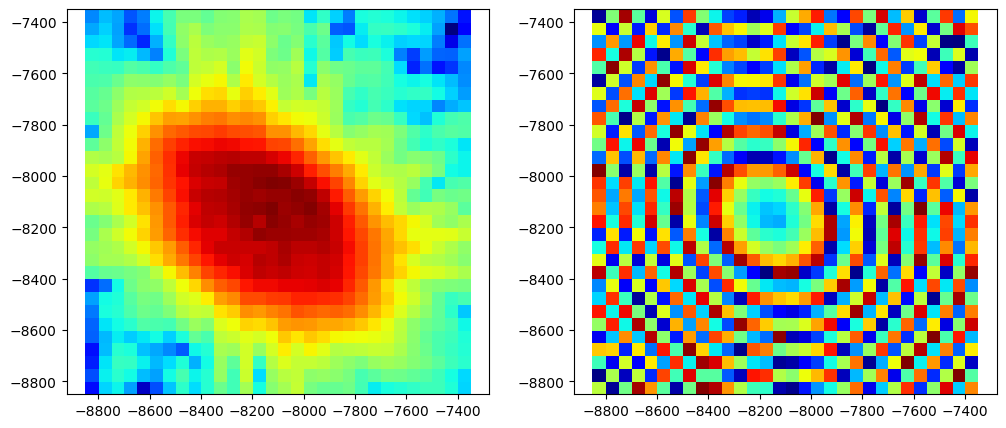

[14] [15] -57.97882061382229


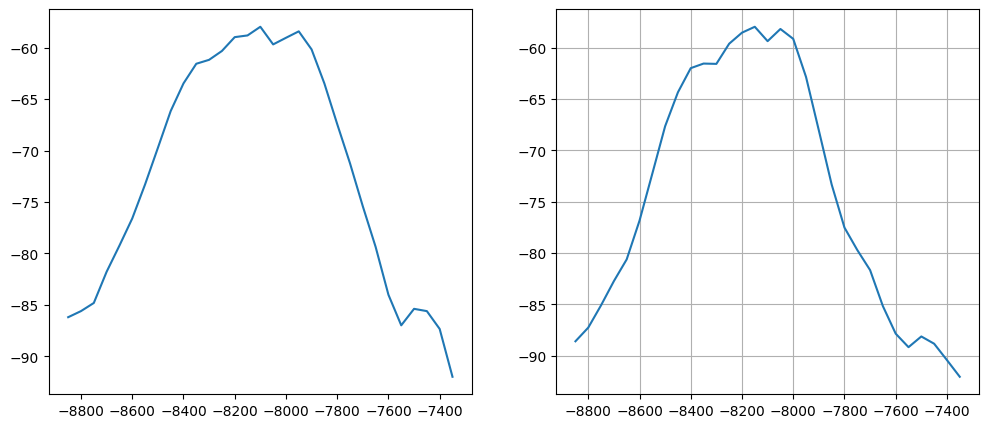

e:\E_Laptop_new\Project in Köln\1_Holography inference\program_oldVersion\examples_Amp\..\ccat_holo\Pyccat.py:482: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p1=axs.pcolor(x,y,


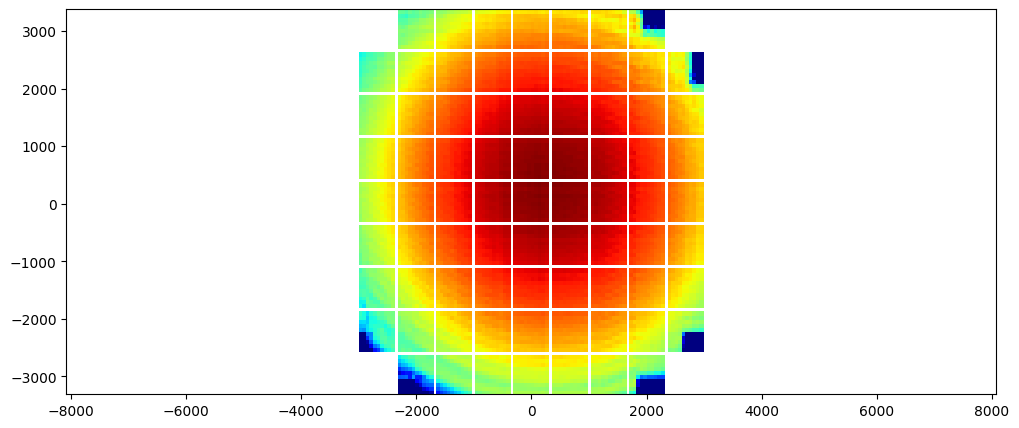

e:\E_Laptop_new\Project in Köln\1_Holography inference\program_oldVersion\examples_Amp\..\ccat_holo\Pyccat.py:495: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p1=axs[0].pcolor(x[0,:],y[:,0],20*np.log10(np.abs(F_IF)),cmap='jet')
e:\E_Laptop_new\Project in Köln\1_Holography inference\program_oldVersion\examples_Amp\..\ccat_holo\Pyccat.py:497: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p2=axs[1].pcolor(x,y,np.angle(F_IF)*180/np.pi,cmap='jet',vmax=180,vmin=

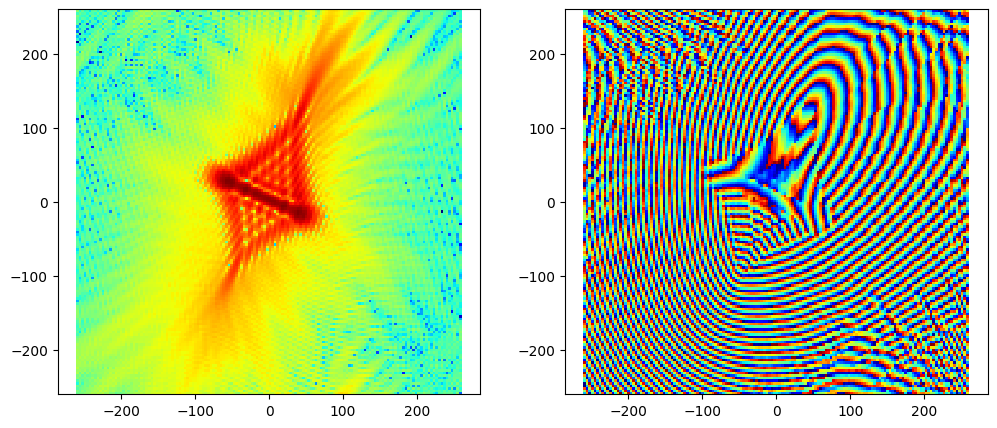

e:\E_Laptop_new\Project in Köln\1_Holography inference\program_oldVersion\examples_Amp\..\ccat_holo\Pyccat.py:512: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p1=axs[0].pcolor(x,y,
e:\E_Laptop_new\Project in Köln\1_Holography inference\program_oldVersion\examples_Amp\..\ccat_holo\Pyccat.py:515: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p2=axs[1].pcolor(x,y,


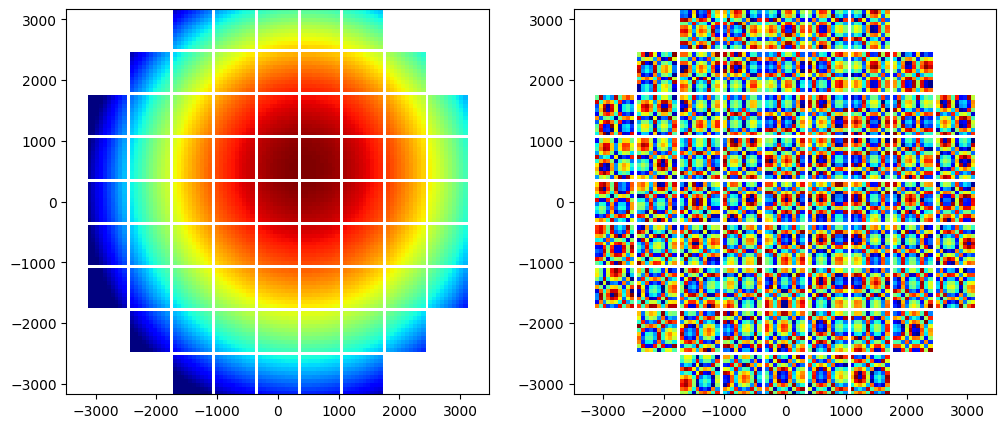

In [13]:
Model.plot_beam(filename= 'Meas_beams2/data_Rx_dx400_dy400_dz600.h5')

In [14]:
'''read the simulated '''
Model.mk_FF(fitting_param='panel adjusters',
            Device=T.device('cpu'),
            Memory_reduc=False)

S0=T.tensor(np.zeros(5*(69+77)))
P_amp=np.zeros((5,6))
P_amp[:,0]=1
P_amp=T.tensor(P_amp.ravel())
P_phase=T.tensor(np.zeros(5*5))

DATA=Model.FF(S0,P_amp,P_phase)
measuredbeams='./Meas_beams2/GRASP_296GHz_31_31_0_1Twist_0umPanel.txt'
np.savetxt(measuredbeams,DATA.numpy(),delimiter=',')

# Model with large-scale deforamtions on M2 M1 & panel errors

In [ ]:
import h5py
import time
import numpy as np
import matplotlib.pyplot as plt
import torch as T
from ccat_holo.Pyccat import CCAT_holo

DEVICE0=T.device('cpu')
measuredbeams1='../Meas_beams2/GRASP_296GHz_51_51_Large_deformations_m2_m1.txt'

In [ ]:
'''Calculate the beam of distorted beam maps'''
holo_setup={'Rx1':([2,0,605],'../scan/51/on-axis.txt'),
            'Rx2':([400-3,400,605],'../scan/51/400_400_600.txt'),
            'Rx3':([400+1,-400+1,605],'../scan/51/400_-400_600.txt'),
            'Rx4':([-400+2,400-1,605],'../scan/51/-400_400_600.txt'),
            'Rx5':([-400+3,-400+3,605],'../scan/51/-400_-400_600.txt')
            }
Model=CCAT_holo('../CCAT_model','../Meas_beams2',holo_conf=holo_setup)
S=np.genfromtxt('../Meas_beams/input_error_panel.txt')


# case without large deformation on M1 and M2, for example M2 is twisted.
co2=np.array([[0., 0., 0.15],
             [0., 0.23, -0.05],
             [-0.02, 0., 0.1]])
E_m2=np.polynomial.polynomial.polyval2d(Model.m2_0.x/Model.R2,Model.m2_0.y/Model.R2,co2)
co1=np.array([[-0.03389496, -0.02361125, -0.11400925],
              [-0.04773631,  0.05859948,  0.05778664],
              [ 0.01346402, -0.20759481,  0.02528261]])
E_m1=np.polynomial.polynomial.polyval2d(Model.m1_0.x/Model.R1,Model.m1_0.y/Model.R1,co1)

Model.First_Beam_cal(S2_init=S[0:5*69],
                     S1_init=S[5*69:],
                     Matrix=True,
                     Error_m2=E_m2,Error_m1=E_m1)

'''read the simulated '''
Model.mk_FF(fitting_param='panel adjusters',
            Device=T.device('cpu'),
            Memory_reduc=False)

S0=T.tensor(np.zeros(5*(69+77)))
P_amp=np.zeros((5,6))
P_amp[:,0]=1
P_amp=T.tensor(P_amp.ravel())
P_phase=T.tensor(np.zeros(5*5))

DATA=Model.FF(S0,P_amp,P_phase)
np.savetxt(measuredbeams1,DATA.numpy(),delimiter=',')